In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import matplotlib.dates as mdate
import numpy as np
import datetime as dt
from itertools import product

import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df = pd.read_csv('entsoe2015-2023.csv', index_col=0)
df = df.rename_axis('Date')
print(df)

                     IT_GR  IT_NORD_AT  IT_NORD_CH  IT_NORD_FR  IT_NORD_SI  \
Date                                                                         
2015-01-01 00:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 01:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 02:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 03:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 04:00:00    NaN         NaN         NaN         NaN         NaN   
...                    ...         ...         ...         ...         ...   
2023-12-30 20:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-30 21:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-30 22:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-30 23:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-31 00:00:00    NaN         NaN         NaN         NaN  

Until 2018, the energy price market had a joint trading zone between Austria, Germany and Luxembourg. After 2018, a separate market appeared in Austria. So we need to merge the columns for them.

In [187]:
df.index = pd.to_datetime(df.index)
df['Year'] = df.index.year
df['Combined_AT_DE_AT_LU'] = df.apply(lambda row: row['DE_AT_LU'] if row['Year'] <= 2018 else row['AT'], axis=1)
df['Combined_DE_LU_DE_AT_LU'] = df.apply(lambda row: row['DE_AT_LU'] if row['Year'] <= 2018 else row['DE_LU'], axis=1)

In [188]:
exclude_columns = ['DE_AT_LU', 'AT', 'DE_LU', 'Year']
df.drop(columns=exclude_columns, inplace=True)
print(df)

                     IT_GR  IT_NORD_AT  IT_NORD_CH  IT_NORD_FR  IT_NORD_SI  \
Date                                                                         
2015-01-01 00:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 01:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 02:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 03:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 04:00:00    NaN         NaN         NaN         NaN         NaN   
...                    ...         ...         ...         ...         ...   
2023-12-30 20:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-30 21:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-30 22:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-30 23:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-31 00:00:00    NaN         NaN         NaN         NaN  

In [189]:
df.describe()

,IT_GR,IT_NORD_AT,IT_NORD_CH,IT_NORD_FR,IT_NORD_SI,IT_SACO_AC,IT_SACO_DC,RS,EE,FI,...,IT_CNOR,IT_CSUD,IT_NORD,IT_SARD,IT_SICI,DK_1,DK_2,GB,Combined_AT_DE_AT_LU,Combined_DE_LU_DE_AT_LU
count,25535.000000,25584.000000,25535.000000,25584.000000,25584.000000,78769.000000,78745.000000,61537.000000,78865.000000,78865.000000,...,78769.000000,78769.000000,78769.000000,78769.000000,78769.000000,78865.000000,78865.000000,52535.000000,76560.000000,76560.000000
mean,46.212678,49.597525,49.611203,49.597525,49.597525,92.274207,233.942089,97.255194,66.013046,55.203629,...,95.745074,94.187325,95.611601,92.169474,99.407151,64.561791,64.387389,43.579257,76.614231,71.124842
std,13.413009,16.570927,16.581585,16.570927,16.570927,93.767176,541.731988,98.837519,74.434402,65.926540,...,98.895820,95.737108,98.929620,93.296439,93.805040,82.122452,81.029469,18.971679,92.211668,86.760863
min,0.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,-60.040000,-500.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-440.100000,-60.040000,-38.800000,-500.000000,-500.000000
25%,38.100000,39.040000,39.050000,39.040000,39.040000,43.130000,45.050000,41.060000,29.670000,25.980000,...,43.710000,43.690000,43.460000,43.130000,47.480000,25.060000,25.970000,33.955000,29.930000,28.920000
50%,45.030000,47.460000,47.490000,47.460000,47.460000,56.200000,60.610000,59.920000,42.190000,37.680000,...,57.510000,56.710000,57.530000,56.200000,64.790000,37.260000,38.320000,41.200000,42.010000,40.690000
75%,52.260000,56.300000,56.320000,56.300000,56.300000,100.000000,129.010000,110.380000,69.310000,55.450000,...,103.080000,102.600000,102.910000,100.000000,112.000000,67.280000,64.050000,50.660000,83.340000,76.610000
max,150.000000,206.120000,206.120000,206.120000,206.120000,1000.000000,3000.000000,889.520000,4000.000000,1000.070000,...,871.000000,870.000000,871.000000,871.000000,870.000000,871.000000,871.000000,999.000000,919.640000,871.000000


# Handling missing values

In [190]:
# df.dropna(inplace=True)
# print(df)

We cant drop missing values because we end up with nothing.

In [191]:
# Overall missing values
total_missing = df.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")

Total missing values in the dataset: 639544


In [192]:
# Missing values per column
missing_per_column = df.isnull().sum()
print(missing_per_column)

IT_GR                      53330
IT_NORD_AT                 53281
IT_NORD_CH                 53330
IT_NORD_FR                 53281
IT_NORD_SI                 53281
IT_SACO_AC                    96
IT_SACO_DC                   120
RS                         17328
EE                             0
FI                             0
LV                             0
SE_1                           0
SE_2                           0
SE_3                           0
SE_4                           0
NO_1                           0
NO_3                           0
NO_4                           0
NO_5                           0
IT_BRNN                    43897
IT_FOGN                    43921
IT_PRGP                    43897
IT_SUD                        96
MK                         73247
NL                            96
NO_2                           0
PL                          4590
PT                            48
RO                           120
SI                             0
SK        

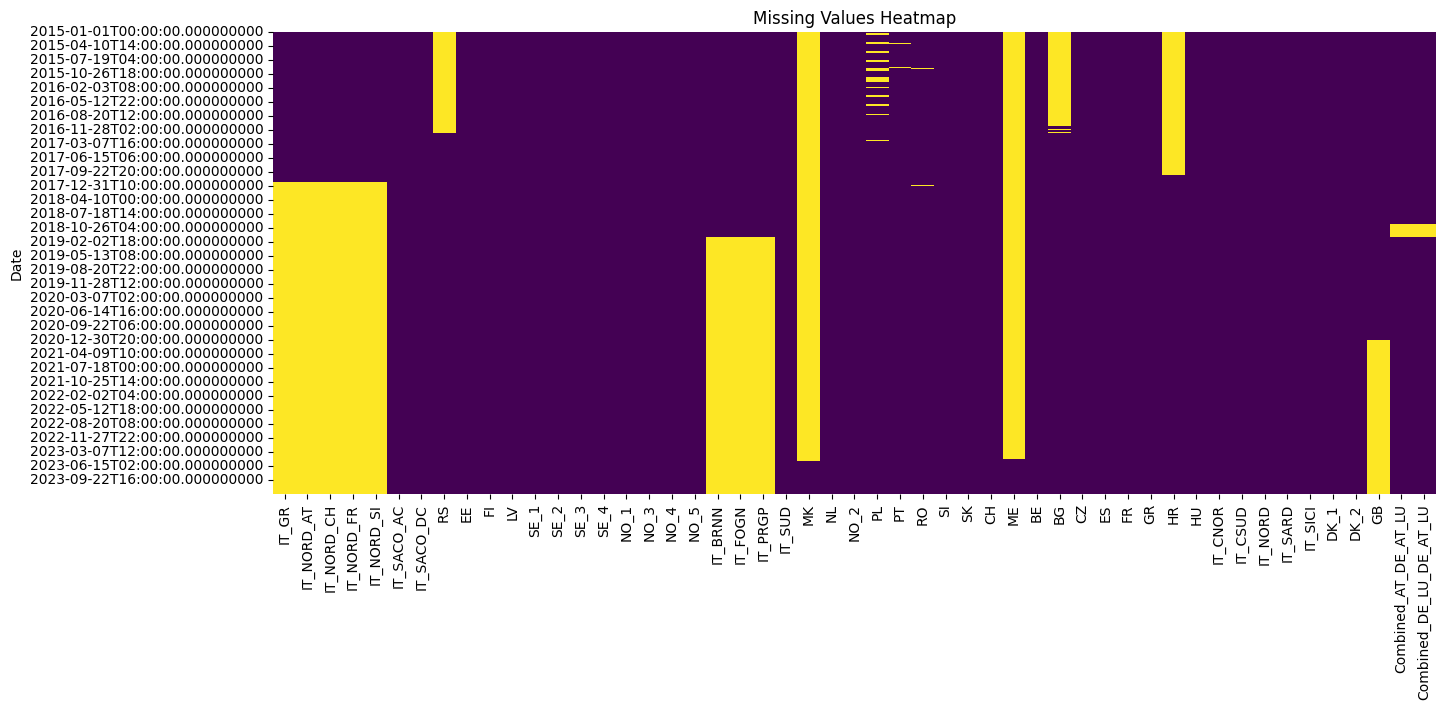

In [193]:
# Heatmap of missing values
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

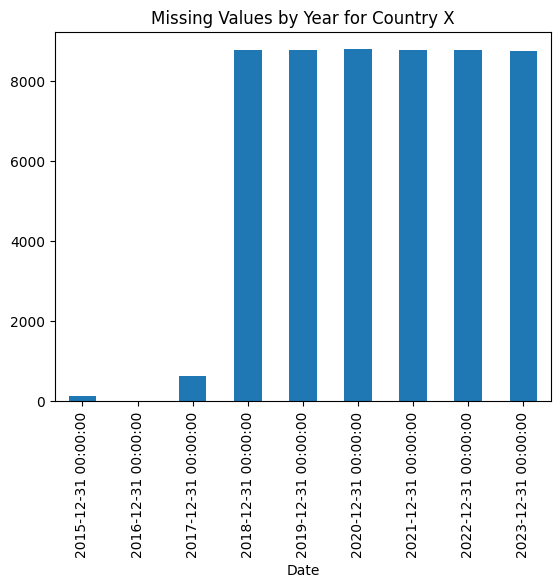

In [194]:
# Example: Count missing values by year for a specific country
missing_by_year = df['IT_GR'].isnull().resample('Y').sum()
missing_by_year.plot(kind='bar')
plt.title('Missing Values by Year for Country X')
plt.show()

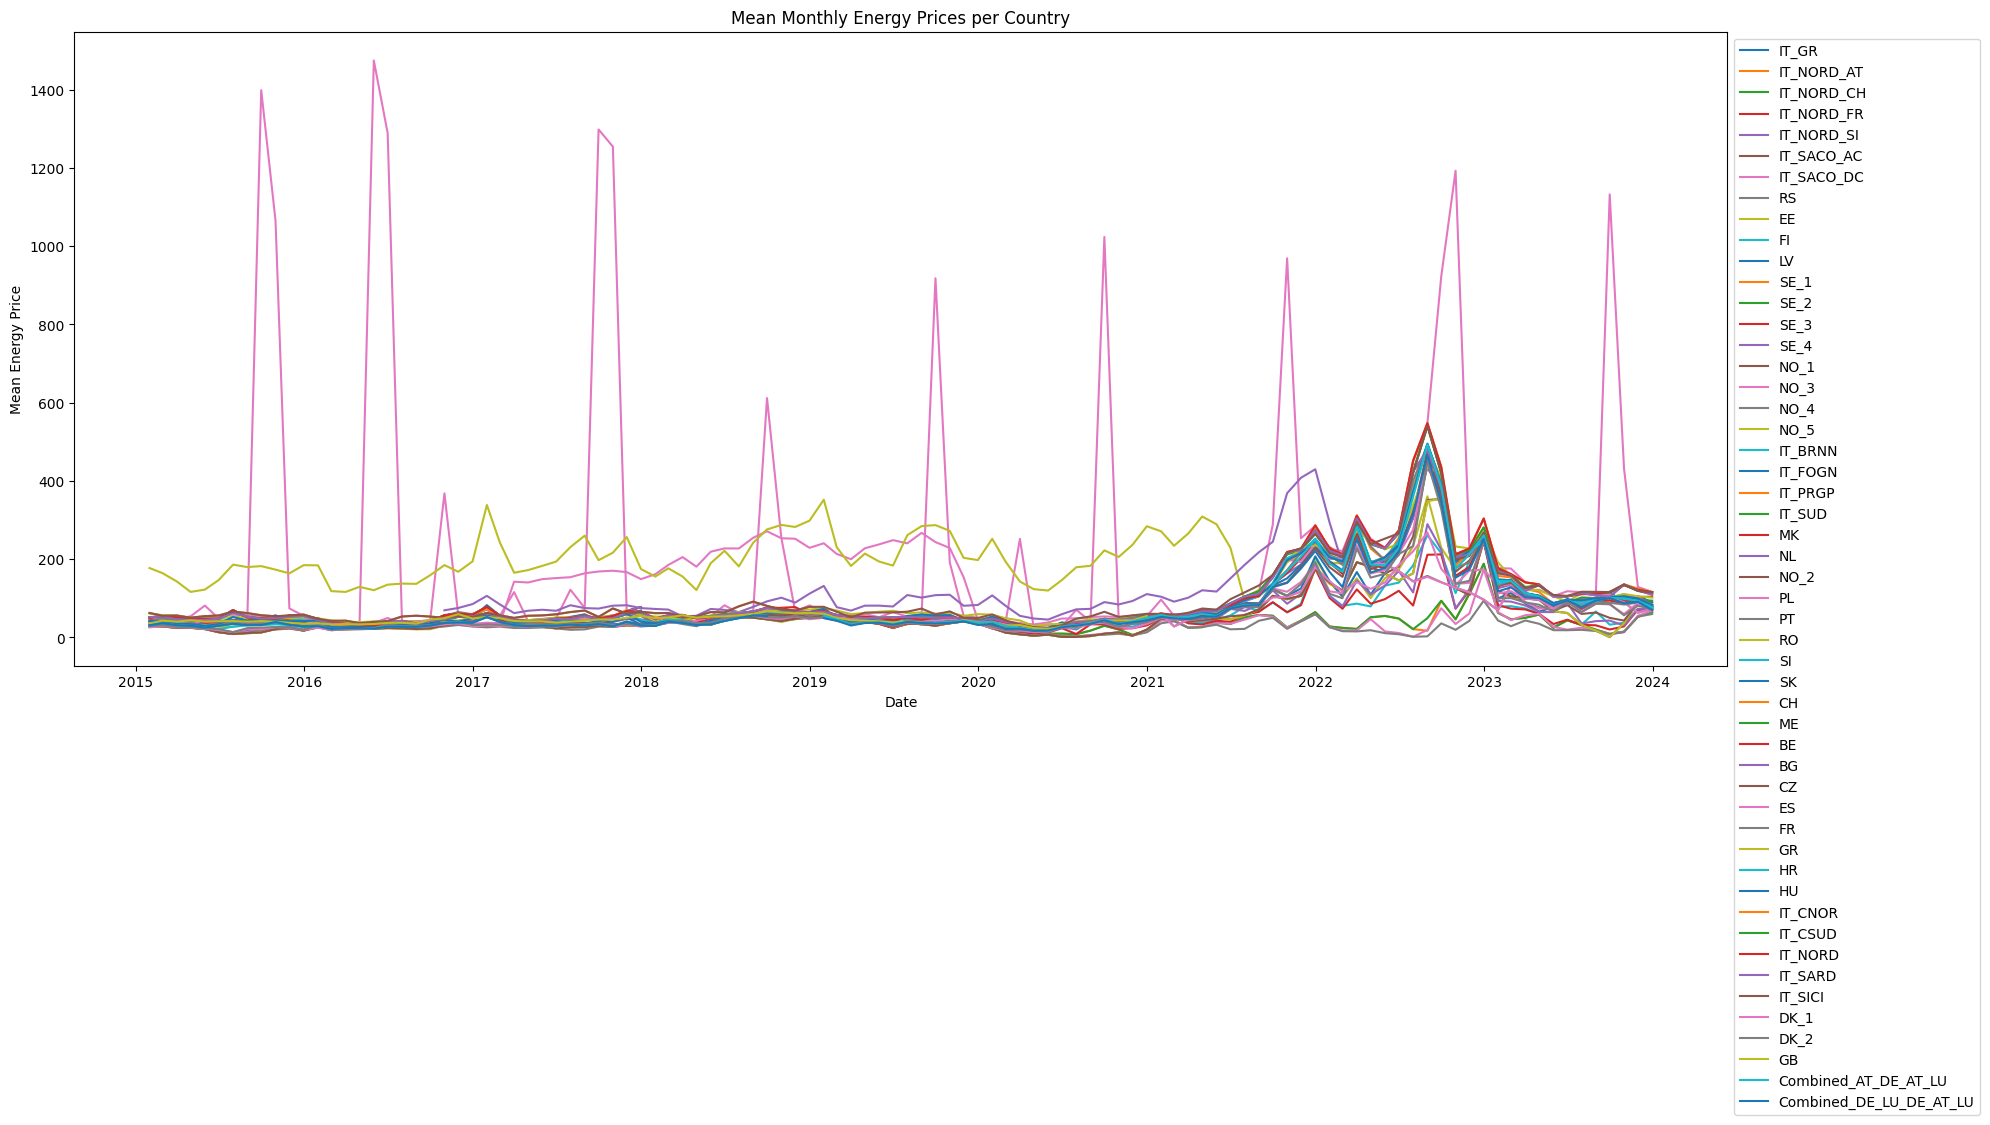

In [195]:
# Resample the data by month and calculate the mean for each country
monthly_mean = df.resample('M').mean()

# Plotting mean energy prices per month/year per country
plt.figure(figsize=(20, 10))  # You can adjust the size to fit your needs

for country in monthly_mean.columns:
    plt.plot(monthly_mean.index, monthly_mean[country], label=country)

plt.xlabel('Date')
plt.ylabel('Mean Energy Price')
plt.title('Mean Monthly Energy Prices per Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend out of the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

# replicate by hour

In [196]:
# Split the data based on the date
train = df[df.index.year < 2020]
test = df[df.index.year >= 2020]

print(train)
print(test)

                     IT_GR  IT_NORD_AT  IT_NORD_CH  IT_NORD_FR  IT_NORD_SI  \
Date                                                                         
2015-01-01 00:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 01:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 02:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 03:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 04:00:00    NaN         NaN         NaN         NaN         NaN   
...                    ...         ...         ...         ...         ...   
2019-12-31 19:00:00    NaN         NaN         NaN         NaN         NaN   
2019-12-31 20:00:00    NaN         NaN         NaN         NaN         NaN   
2019-12-31 21:00:00    NaN         NaN         NaN         NaN         NaN   
2019-12-31 22:00:00    NaN         NaN         NaN         NaN         NaN   
2019-12-31 23:00:00    NaN         NaN         NaN         NaN  

Normalize the Data


# Combine data with query_aggregate_water_reservoirs_and_hydro_storage, biomass, gas, 

In [197]:
df_reserv = pd.read_csv('query_aggregate_water_reservoirs_and_hydro_storage.csv', index_col=0)
df_reserv = df_reserv.rename_axis('Date')
print(df_reserv.head())

                            AT         BG  CH         FI         FR  GR  \
Date                                                                      
2015-01-04 22:00:00        NaN  1970971.0 NaN        NaN        NaN NaN   
2015-01-04 23:00:00  1019454.0        NaN NaN  3406000.0  2648112.0 NaN   
2015-01-11 22:00:00        NaN  1921031.0 NaN        NaN        NaN NaN   
2015-01-11 23:00:00   996580.0        NaN NaN  3324000.0  2622624.0 NaN   
2015-01-18 22:00:00        NaN  1923410.0 NaN        NaN        NaN NaN   

                           HR   IT_CSUD   IT_SARD    IT_NORD  ...        NO_5  \
Date                                                          ...               
2015-01-04 22:00:00       NaN       NaN       NaN        NaN  ...         NaN   
2015-01-04 23:00:00  952270.0  658056.0  110035.0  2971448.0  ...  10646000.0   
2015-01-11 22:00:00       NaN       NaN       NaN        NaN  ...         NaN   
2015-01-11 23:00:00  918570.0  651924.0  108592.0  2882536.0  ...  10

In [198]:
df_reserv.rename(columns={'AT': 'Combined_AT_DE_AT_LU'}, inplace=True)
df_reserv.dropna(axis=1, how='all', inplace=True)
df_reserv = df_reserv.stack().reset_index()
df_reserv.set_index(['Date', 'level_1'], inplace=True)
df_reserv.index = df_reserv.index.set_names(['Date', 'Country'])
df_reserv.rename(columns={0: 'water_reservoirs_and_hydro_storage'}, inplace=True)
pd.to_datetime(df_reserv.index.get_level_values(0))
df_reserv.head()

water_reservoirs_and_hydro_storage
Date                Country                                                 
2015-01-04 22:00:00 BG                                             1970971.0
                    RO                                             1721600.0
                    LV                                               10179.0
2015-01-04 23:00:00 Combined_AT_DE_AT_LU                           1019454.0
                    FI                                             3406000.0

In [199]:
df_copy = df.copy()
df_copy.dropna(axis=1, how='all', inplace=True)
df_copy= df_copy.stack().reset_index()
df_copy.set_index(['Date', 'level_1'], inplace=True)
df_copy.index = df_copy.index.set_names(['Date', 'Country'])
df_copy.rename(columns={0: 'energy_price'}, inplace=True)
pd.to_datetime(df_copy.index.get_level_values(0))
df_copy.head(10)

energy_price
Date       Country              
2015-01-01 EE              27.38
           FI              27.38
           LV              30.03
           SE_1            27.38
           SE_2            27.38
           SE_3            27.38
           SE_4            27.38
           NO_1            27.40
           NO_3            28.16
           NO_4            28.16

In [200]:
df_copy.head(200)

energy_price
Date                Country              
2015-01-01 00:00:00 EE              27.38
                    FI              27.38
                    LV              30.03
                    SE_1            27.38
                    SE_2            27.38
...                                   ...
2015-01-01 08:00:00 SE_1            26.97
                    SE_2            26.97
                    SE_3            26.97
                    SE_4            26.97
                    NO_1            26.97

[200 rows x 1 columns]

In [201]:
combined_df = pd.merge(df_reserv, df_copy, left_index=True, right_index=True, how='outer')
combined_df.head()

/var/folders/8w/tn0n7t0s3xj25yhn7fm6r3gh0000gn/T/ipykernel_3088/2256297529.py:1: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  combined_df = pd.merge(df_reserv, df_copy, left_index=True, right_index=True, how='outer')


water_reservoirs_and_hydro_storage  \
Date                Country                                                    
2015-01-04 22:00:00 BG                                             1970971.0   
                    RO                                             1721600.0   
                    LV                                               10179.0   
2015-01-04 23:00:00 Combined_AT_DE_AT_LU                           1019454.0   
                    FI                                             3406000.0   

                                          energy_price  
Date                Country                             
2015-01-04 22:00:00 BG                             NaN  
                    RO                             NaN  
                    LV                             NaN  
2015-01-04 23:00:00 Combined_AT_DE_AT_LU           NaN  
                    FI                             NaN

In [202]:
df_biomass = pd.read_csv('data/biomass_merged.csv', sep=";",  index_col=0)
df_biomass.index = pd.to_datetime(df_biomass.index)
df_biomass['Year'] = df_biomass.index.year
df_biomass['Combined_AT_DE_AT_LU'] = df_biomass.apply(lambda row: row['DE_AT_LU'] if row['Year'] <= 2018 else row['AT'], axis=1)
df_biomass['Combined_DE_LU_DE_AT_LU'] = df_biomass.apply(lambda row: row['DE_AT_LU'] if row['Year'] <= 2018 else row['DE_LU'], axis=1)
exclude_columns = ['DE_AT_LU', 'AT', 'DE_LU', 'Year', 'BG.1', 'IT_CSUD.1', 'IT_NORD.1']
df_biomass.drop(columns=exclude_columns, inplace=True)
df_biomass = df_biomass.rename_axis('Date')
pd.to_datetime(df_biomass.index.get_level_values(0))
df_biomass.head()

,BG,BE,CZ,DK_1,DK_2,EE,ES,FR,GB,HR,...,LV,NO_1,NO_3,PL,PT,RO,RS,SI,Combined_AT_DE_AT_LU,Combined_DE_LU_DE_AT_LU
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,NaN,68.0,135.0,18.0,25.0,NaN,447.0,193.0,NaN,NaN,...,NaN,NaN,NaN,NaN,307.0,NaN,NaN,10.0,4307.50,4307.50
2015-01-01 01:00:00,18.0,69.0,136.0,15.0,24.0,65.0,449.0,193.0,NaN,NaN,...,81.0,NaN,NaN,NaN,310.0,NaN,NaN,9.0,4266.25,4266.25
2015-01-01 02:00:00,19.0,69.0,137.0,14.0,25.0,61.0,448.0,193.0,NaN,NaN,...,82.0,NaN,NaN,NaN,316.0,NaN,NaN,9.0,4301.00,4301.00
2015-01-01 03:00:00,18.0,68.0,138.0,14.0,25.0,62.0,438.0,193.0,NaN,NaN,...,82.0,NaN,NaN,NaN,315.0,NaN,NaN,9.0,4319.50,4319.50
2015-01-01 04:00:00,18.0,67.0,137.0,14.0,25.0,61.0,428.0,193.0,NaN,NaN,...,84.0,NaN,NaN,NaN,316.0,NaN,NaN,9.0,4314.75,4314.75


In [203]:
def preprocess_dataframe(df, column_name):
    # Drop columns with all NaN values
    df.dropna(axis=1, how='all', inplace=True)
    
    # Stack the DataFrame to reshape it
    df_stacked = df.stack().reset_index()
    
    # Set Date and level_1 as index
    df_stacked.set_index(['Date', 'level_1'], inplace=True)
    df_stacked.index = df_stacked.index.set_names(['Date', 'Country'])
    
    # Rename the stacked column to the specified column name
    df_stacked.rename(columns={0: column_name}, inplace=True)
    
    return df_stacked

In [204]:
df_biomass_1 = preprocess_dataframe(df_biomass.copy(), 'biomass')
df_biomass_1.head()

biomass
Date       Country         
2015-01-01 BE          68.0
           CZ         135.0
           DK_1        18.0
           DK_2        25.0
           ES         447.0

In [205]:
combined_df_1 = pd.merge(combined_df, df_biomass_1, left_index=True, right_index=True, how='outer')
combined_df_1

/var/folders/8w/tn0n7t0s3xj25yhn7fm6r3gh0000gn/T/ipykernel_3088/1960750130.py:1: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  combined_df_1 = pd.merge(combined_df, df_biomass_1, left_index=True, right_index=True, how='outer')


water_reservoirs_and_hydro_storage  \
Date                Country                                                    
2015-01-04 22:00:00 BG                                             1970971.0   
                    RO                                             1721600.0   
                    LV                                               10179.0   
2015-01-04 23:00:00 Combined_AT_DE_AT_LU                           1019454.0   
                    FI                                             3406000.0   
...                                                                      ...   
2021-03-28 02:00:00 LT                                                   NaN   
2022-03-27 02:00:00 LT                                                   NaN   
2023-03-26 02:00:00 LT                                                   NaN   
2023-12-31 00:00:00 LT                                                   NaN   
2014-12-31 23:00:00 PT                                                   NaN   

                                          energy_price  biomass  
Date                Country                                      
2015-01-04 22:00:00 BG                             NaN      NaN  
                    RO                             NaN      NaN  
                    LV                             NaN      NaN  
2015-01-04 23:00:00 Combined_AT_DE_AT_LU           NaN      NaN  
                    FI                             NaN      NaN  
...                                                ...      ...  
2021-03-28 02:00:00 LT                             NaN     50.0  
2022-03-27 02:00:00 LT                             NaN     55.0  
2023-03-26 02:00:00 LT                             NaN     32.0  
2023-12-31 00:00:00 LT                             NaN     33.0  
2014-12-31 23:00:00 PT                             NaN    310.0  

[3571735 rows x 3 columns]

In [206]:
df_gas = pd.read_csv('data/gass_merged.csv', sep=";",  index_col=0)
df_gas.index = pd.to_datetime(df_gas.index)
df_gas['Year'] = df_gas.index.year
df_gas['Combined_AT_DE_AT_LU'] = df_gas.apply(lambda row: row['DE_AT_LU'] if row['Year'] <= 2018 else row['AT'], axis=1)
exclude_columns = ['DE_AT_LU', 'AT', 'Year']
df_gas.drop(columns=exclude_columns, inplace=True)
df_gas = df_gas.rename_axis('Date')
pd.to_datetime(df_gas.index.get_level_values(0))
df_gas.head()

,BG,BE,CH,CZ,GR,DK_1,DK_2,EE,ES,FR,...,NO_5,PL,PT,RO,RS,SE_2,SE_3,SE_4,SI,Combined_AT_DE_AT_LU
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,NaN,2536.0,NaN,172.0,NaN,233.0,304.0,NaN,4844.0,2823.0,...,96.0,NaN,454.0,NaN,NaN,NaN,NaN,NaN,57.0,2251.00
2015-01-01 01:00:00,NaN,2509.0,NaN,175.0,506.0,225.0,303.0,5.0,5196.0,2515.0,...,96.0,NaN,446.0,NaN,NaN,NaN,NaN,NaN,56.0,1716.25
2015-01-01 02:00:00,NaN,2463.0,NaN,174.0,476.0,240.0,303.0,5.0,4857.0,2452.0,...,96.0,NaN,446.0,NaN,NaN,NaN,NaN,NaN,56.0,1567.50
2015-01-01 03:00:00,NaN,2243.0,NaN,175.0,437.0,188.0,303.0,5.0,4314.0,2345.0,...,96.0,NaN,448.0,NaN,NaN,NaN,NaN,NaN,57.0,1559.25
2015-01-01 04:00:00,NaN,2134.0,NaN,177.0,504.0,172.0,303.0,5.0,4130.0,2344.0,...,96.0,NaN,448.0,NaN,NaN,NaN,NaN,NaN,57.0,1563.50


In [207]:
df_gas_1 = preprocess_dataframe(df_gas.copy(), 'gas')
df_gas_1.head()

gas
Date       Country        
2015-01-01 BE       2536.0
           CZ        172.0
           DK_1      233.0
           DK_2      304.0
           ES       4844.0

In [208]:
combined_df_2 = pd.merge(combined_df_1, df_gas_1, left_index=True, right_index=True, how='outer')
combined_df_2

/var/folders/8w/tn0n7t0s3xj25yhn7fm6r3gh0000gn/T/ipykernel_3088/2727253431.py:1: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  combined_df_2 = pd.merge(combined_df_1, df_gas_1, left_index=True, right_index=True, how='outer')


water_reservoirs_and_hydro_storage  \
Date                Country                                                    
2015-01-04 22:00:00 BG                                             1970971.0   
                    RO                                             1721600.0   
                    LV                                               10179.0   
2015-01-04 23:00:00 Combined_AT_DE_AT_LU                           1019454.0   
                    FI                                             3406000.0   
...                                                                      ...   
2023-12-24 23:00:00 NO_5                                                 NaN   
                    RS                                                   NaN   
                    SE_2                                                 NaN   
                    SE_3                                                 NaN   
                    SE_4                                                 NaN   

                                          energy_price  biomass   gas  
Date                Country                                            
2015-01-04 22:00:00 BG                             NaN      NaN   NaN  
                    RO                             NaN      NaN   NaN  
                    LV                             NaN      NaN   NaN  
2015-01-04 23:00:00 Combined_AT_DE_AT_LU           NaN      NaN   NaN  
                    FI                             NaN      NaN   NaN  
...                                                ...      ...   ...  
2023-12-24 23:00:00 NO_5                           NaN      NaN  13.0  
                    RS                             NaN      NaN  73.0  
                    SE_2                           NaN      NaN   0.0  
                    SE_3                           NaN      NaN   0.0  
                    SE_4                           NaN      NaN   0.0  

[3574575 rows x 4 columns]

In [209]:
print(combined_df_2.index.get_level_values(1).unique())

Index(['BG', 'RO', 'LV', 'Combined_AT_DE_AT_LU', 'FI', 'FR', 'HR', 'IT_CSUD',
       'IT_SARD', 'IT_NORD', 'IT_SICI', 'IT_SUD', 'NO_1', 'NO_2', 'NO_3',
       'NO_4', 'NO_5', 'SE_1', 'SE_2', 'SE_3', 'SE_4', 'SI', 'ME', 'CH', 'RS',
       'GR', 'MK', 'EE', 'PT', 'SK', 'CZ', 'ES', 'HU', 'DK_1', 'DK_2', 'GB',
       'PL', 'IT_GR', 'IT_NORD_AT', 'IT_NORD_CH', 'IT_NORD_FR', 'IT_NORD_SI',
       'IT_SACO_AC', 'IT_SACO_DC', 'IT_BRNN', 'IT_FOGN', 'IT_PRGP', 'NL', 'BE',
       'IT_CNOR', 'Combined_DE_LU_DE_AT_LU', 'LU', 'LT'],
      dtype='object', name='Country')


In [210]:
df_nuclear = pd.read_csv('data/nuclear.csv', sep=";",  index_col=0)
df_nuclear.rename(columns={'Nuclear_SI': 'SI', 'CH': 'CH'}, inplace=True)
df_nuclear.index = pd.to_datetime(df_nuclear.index)
df_nuclear['Combined_AT_DE_AT_LU'] = df_nuclear['DE_AT_LU']
exclude_columns = ['DE_AT_LU']
df_nuclear.drop(columns=exclude_columns, inplace=True)
df_nuclear = df_nuclear.rename_axis('Date')
pd.to_datetime(df_nuclear.index.get_level_values(0))
df_nuclear.tail()

,BE,BG,CH,CZ,LU,ES,FR,GB,HU,RO,SE_3,SI,Combined_AT_DE_AT_LU
Date,,,,,,,,,,,,,
2022-01-01 00:00:00,NaN,2169.0,NaN,NaN,NaN,NaN,NaN,NaN,1947.333333,1417.25,NaN,NaN,NaN
2022-03-27 02:00:00,NaN,2170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1412.00,NaN,NaN,NaN
2023-01-01 00:00:00,NaN,2166.0,NaN,NaN,NaN,6464.0,NaN,NaN,1953.000000,1408.00,NaN,NaN,NaN
2023-03-26 02:00:00,NaN,2170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1412.00,NaN,NaN,NaN
2023-12-31 00:00:00,NaN,2122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1396.25,NaN,NaN,NaN


In [211]:
df_nuclear.columns

Index(['BE', 'BG', 'CH', 'CZ', 'LU', 'ES', 'FR', 'GB', 'HU', 'RO', 'SE_3',
       'SI', 'Combined_AT_DE_AT_LU'],
      dtype='object')

In [212]:
df_nuclear_1 = preprocess_dataframe(df_nuclear.copy(), 'nuclear')
df_nuclear_1.tail(100)

nuclear
Date                Country          
2023-12-30 20:00:00 CH        3020.00
                    CZ        3462.00
                    ES        7013.00
                    FR       43246.00
                    HU        1880.25
...                               ...
2023-01-01 00:00:00 RO        1408.00
2023-03-26 02:00:00 BG        2170.00
                    RO        1412.00
2023-12-31 00:00:00 BG        2122.00
                    RO        1396.25

[100 rows x 1 columns]

In [213]:
combined_df_3 = pd.merge(combined_df_2, df_nuclear_1, left_index=True, right_index=True, how='outer')
combined_df_3

/var/folders/8w/tn0n7t0s3xj25yhn7fm6r3gh0000gn/T/ipykernel_3088/3960762837.py:1: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  combined_df_3 = pd.merge(combined_df_2, df_nuclear_1, left_index=True, right_index=True, how='outer')


water_reservoirs_and_hydro_storage  \
Date                Country                                                    
2015-01-04 22:00:00 BG                                             1970971.0   
                    RO                                             1721600.0   
                    LV                                               10179.0   
2015-01-04 23:00:00 Combined_AT_DE_AT_LU                           1019454.0   
                    FI                                             3406000.0   
...                                                                      ...   
2023-11-26 23:00:00 CH                                                   NaN   
2023-12-03 23:00:00 CH                                                   NaN   
2023-12-10 23:00:00 CH                                                   NaN   
2023-12-17 23:00:00 CH                                                   NaN   
2023-12-24 23:00:00 CH                                                   NaN   

                                          energy_price  biomass  gas  nuclear  
Date                Country                                                    
2015-01-04 22:00:00 BG                             NaN      NaN  NaN      NaN  
                    RO                             NaN      NaN  NaN      NaN  
                    LV                             NaN      NaN  NaN      NaN  
2015-01-04 23:00:00 Combined_AT_DE_AT_LU           NaN      NaN  NaN      NaN  
                    FI                             NaN      NaN  NaN      NaN  
...                                                ...      ...  ...      ...  
2023-11-26 23:00:00 CH                             NaN      NaN  NaN   3027.0  
2023-12-03 23:00:00 CH                             NaN      NaN  NaN   3024.0  
2023-12-10 23:00:00 CH                             NaN      NaN  NaN   3009.0  
2023-12-17 23:00:00 CH                             NaN      NaN  NaN   3028.0  
2023-12-24 23:00:00 CH                             NaN      NaN  NaN   3022.0  

[3575052 rows x 5 columns]